# Data Preprocessing
## Step 1: Import the necessary libraries

In [2]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2: Load the dataset

In [4]:
df = pd.read_excel('Employee_Retention.xlsx')
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


## Step 3: Check data information

In [6]:
#Change all missing values ​​(whether originally NaN, '-', or 'None') to None.
df = df.where(pd.notna(df), None)
df = df.replace({'-':None,'None': None, np.nan: None})
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,None
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,None
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,+6283343465xxx,dopeySheep0297@icloud.com,Sarjana,1,None,None,1973-12-08,2011-9-26,2016-03-01,None
283,yearningPorpoise4,106254,None,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,...,+6281222782xxx,yearningPorpoise4421@yahoo.com,Sarjana,1,None,jam_kerja,1974-12-01,2013-5-13,2020-1-28,2017-11-15
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,...,+6285821950xxx,murkySausage9688@yahoo.com,Sarjana,1,1.0,ganti_karir,1969-10-30,2013-11-11,2020-1-21,2018-06-08
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,...,+6287787391xxx,truthfulMoth4663@yahoo.com,Sarjana,1,0.0,kejelasan_karir,1981-10-01,2011-5-16,2014-04-05,2018-04-01


In [7]:
#Check is there a duplicate or not
df.duplicated().sum()

0

In [8]:
data_summary = pd.DataFrame({
    'Total Null': df.isna().sum(),
    'Percentage Null': df.isna().sum() * 100/ len(df),
    'Number of Unique Values': df.nunique(),
    'Data Type': df.dtypes,
    'Unique Values': df.apply(lambda col: col.dropna().unique().tolist()),
    'Mode': df.apply(lambda col: col.mode().iloc[0] if not col.mode().empty else None)
})

#Format Percentage Null
data_summary['Percentage Null'] = data_summary['Percentage Null'].apply(
    lambda x: f"{x:.2f}%" if x != 0 else "0%"
)

data_summary

,Total Null,Percentage Null,Number of Unique Values,Data Type,Unique Values,Mode
Username,0,0%,285,object,"[spiritedPorpoise3, jealousGelding2, pluckyMue...",boredEggs0
EnterpriseID,0,0%,287,int64,"[111065, 106080, 106452, 106325, 111171, 10641...",100282
StatusPernikahan,3,1.05%,4,object,"[Belum_menikah, Menikah, Bercerai, Lainnya]",Belum_menikah
JenisKelamin,0,0%,2,object,"[Pria, Wanita]",Wanita
StatusKepegawaian,0,0%,3,object,"[Outsource, FullTime, Internship]",FullTime
Pekerjaan,0,0%,14,object,"[Software Engineer (Back End), Data Analyst, S...",Software Engineer (Back End)
JenjangKarir,0,0%,3,object,"[Freshgraduate_program, Senior_level, Mid_level]",Freshgraduate_program
PerformancePegawai,0,0%,5,object,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku...",Biasa
AsalDaerah,0,0%,5,object,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ...",Jakarta Pusat
HiringPlatform,0,0%,9,object,"[Employee_Referral, Website, Indeed, LinkedIn,...",Indeed


## Step 4: Preprocessing

### Fill Null Values
Column that have null values are:  

- **StatusPernikahan** peope who do not fill in this column may indicate that they are still single, so fill it with 'Belum_menikah' which is also the mode of this column.
- **SkorKepuasanPegawai** fill with the median to avoid being affected by data distribution  
- **JumlahKeikutsertaanProjek**, **JumlahKeterlambatanSebulanTerakhir**, **JumlahKetidakhadiran** fill with 0 because assume that people who don't fill it out have never participated in a project, have never been late in the last month, and have never been absent.  
- **IkutProgramLOP** has too many null values ​​with a percentage of 89% but it might be useful for EDA but not useful for machine learning analysis. So I will keep it.
- **AlasanResign** people who do not fill in this column may indicate they are still working, so fill it with 'masih_bekerja' which is also the mode of this column.
- **TanggalResign** null values in this column indicates that the employee is still working, so it does not need to be filled in for now.

In [11]:
df.fillna({
    'StatusPernikahan': 'Belum_menikah',
    'SkorKepuasanPegawai': df['SkorKepuasanPegawai'].median(),
    'JumlahKetidakhadiran': 0,
    'JumlahKeterlambatanSebulanTerakhir': 0,
    'JumlahKeikutsertaanProjek': 0,
    'AlasanResign': 'masih_bekerja'
}, inplace=True)

df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

### Drop the Column **PernahBekerja**

**PernahBekerja** column has 2 unique values that has the same meaning, which is *1* and *yes*. It would be useless because this column only have 1 value.

In [13]:
df.drop(columns=['PernahBekerja'], inplace=True)

### Change some columns datatype properly

In [15]:
# string
string_cols = ['Username','EnterpriseID','StatusPernikahan','JenisKelamin','StatusKepegawaian','Pekerjaan', 'JenjangKarir', 
               'PerformancePegawai','AsalDaerah', 'HiringPlatform','NomorHP','Email', 'TingkatPendidikan','AlasanResign']

df[string_cols] = df[string_cols].astype(str)

# numerical (integer)
num_cols = ['SkorSurveyEngagement','SkorKepuasanPegawai','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']
df[num_cols] = df[num_cols].astype(int)

# date
date_cols = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

# Feature Engineering

In [17]:
df2 = df.drop(['Username', 'EnterpriseID', 'NomorHP', 'Email'], axis=1)

In [18]:
df2['TahunHiring'] = df2['TanggalHiring'].dt.year
df2['TahunResign'] = df2['TanggalResign'].dt.year

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    287 non-null    object        
 1   JenisKelamin                        287 non-null    object        
 2   StatusKepegawaian                   287 non-null    object        
 3   Pekerjaan                           287 non-null    object        
 4   JenjangKarir                        287 non-null    object        
 5   PerformancePegawai                  287 non-null    object        
 6   AsalDaerah                          287 non-null    object        
 7   HiringPlatform                      287 non-null    object        
 8   SkorSurveyEngagement                287 non-null    int32         
 9   SkorKepuasanPegawai                 287 non-null    int32         
 10  JumlahKeikutsertaanProjek 

# Exploratory Data Analysis
## A. Annual Report on Employee Number Changes
### 1. Create Aggregate Table
- First Table: Count the number of employees who entered based on the year of hiring
- Second Table: Count the number of employees who left based on the year of resignation

In [21]:
tabel_masuk = df2.groupby('TahunHiring').size().reset_index(name='JumlahMasuk')
tabel_keluar = df2.groupby('TahunResign').size().reset_index(name='JumlahKeluar')

tabel_masuk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   TahunHiring  13 non-null     int32
 1   JumlahMasuk  13 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 288.0 bytes


In [22]:
tabel_keluar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TahunResign   8 non-null      float64
 1   JumlahKeluar  8 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 260.0 bytes


In [23]:
#change datatype TahunResign to integer
tabel_keluar['TahunResign'] = tabel_keluar['TahunResign'].astype(int)

tabel_keluar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   TahunResign   8 non-null      int32
 1   JumlahKeluar  8 non-null      int64
dtypes: int32(1), int64(1)
memory usage: 228.0 bytes


### 2. Join Table

In [25]:
# Outer join by year
tabel_gabung = pd.merge(tabel_masuk, tabel_keluar, left_on='TahunHiring', right_on='TahunResign', how='outer')

# merge year columns
tabel_gabung['Tahun'] = tabel_gabung['TahunHiring'].fillna(tabel_gabung['TahunResign'])

# Delete TahunHiring and TahunResign
tabel_gabung.drop(columns=['TahunHiring', 'TahunResign'], inplace=True)

# Sort by year
tabel_gabung = tabel_gabung.sort_values('Tahun').reset_index(drop=True)

tabel_gabung

,JumlahMasuk,JumlahKeluar,Tahun
0,1.0,NaN,2006.0
1,2.0,NaN,2007.0
2,2.0,NaN,2008.0
3,7.0,NaN,2009.0
4,8.0,NaN,2010.0
5,76.0,NaN,2011.0
6,41.0,NaN,2012.0
7,43.0,5.0,2013.0
8,56.0,12.0,2014.0
9,31.0,8.0,2015.0


### 3. Fill Null Values

In [27]:
tabel_gabung['JumlahMasuk'] = tabel_gabung['JumlahMasuk'].fillna(0)
tabel_gabung['JumlahKeluar'] = tabel_gabung['JumlahKeluar'].fillna(0)

### 4. Calculate Total Employees Who Resigned, Retained, and Turnover

In [29]:
#Total employees who resigned and Total employees who retained
tabel_gabung['TotalResign'] = tabel_gabung['JumlahKeluar'].cumsum()
tabel_gabung['TotalBertahan'] = tabel_gabung['JumlahMasuk'].cumsum() - tabel_gabung['TotalResign']

#Turnover: the difference between the number of employees who joined and left each year.
tabel_gabung['Turnover'] = tabel_gabung['JumlahMasuk'] - tabel_gabung['JumlahKeluar']

tabel_gabung = tabel_gabung[['Tahun', 'JumlahMasuk', 'JumlahKeluar', 'TotalResign', 'TotalBertahan', 'Turnover']]
tabel_gabung = tabel_gabung.astype(int)

tabel_gabung

,Tahun,JumlahMasuk,JumlahKeluar,TotalResign,TotalBertahan,Turnover
0,2006,1,0,0,1,1
1,2007,2,0,0,3,2
2,2008,2,0,0,5,2
3,2009,7,0,0,12,7
4,2010,8,0,0,20,8
5,2011,76,0,0,96,76
6,2012,41,0,0,137,41
7,2013,43,5,5,175,38
8,2014,56,12,17,219,44
9,2015,31,8,25,242,23


### 5. Create Visualization

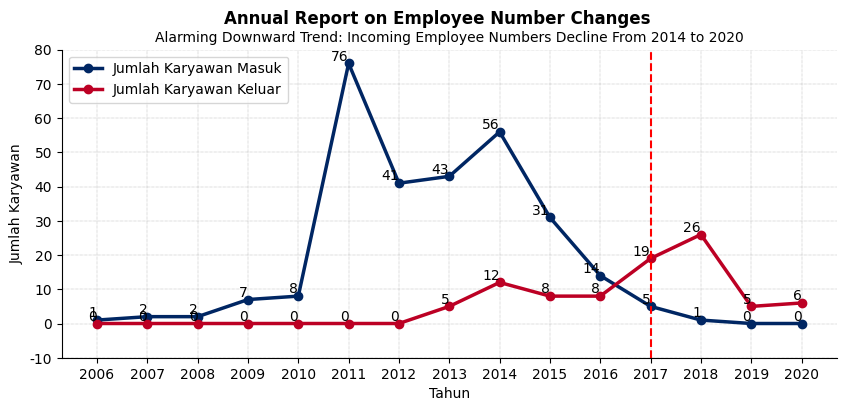

In [31]:
plt.figure(figsize=(10, 4))
plt.plot(tabel_gabung['Tahun'], tabel_gabung['JumlahMasuk'], label='Jumlah Karyawan Masuk', marker='o', 
        linewidth=2.5, color='#002663')
plt.plot(tabel_gabung['Tahun'], tabel_gabung['JumlahKeluar'], label='Jumlah Karyawan Keluar', marker='o',
        linewidth=2.5, color='#bc0024')

for i in range(len(tabel_gabung)):
    plt.text(tabel_gabung['Tahun'][i], tabel_gabung['JumlahMasuk'][i], tabel_gabung['JumlahMasuk'][i], fontsize=10, 
             ha='right', va='bottom')
    plt.text(tabel_gabung['Tahun'][i], tabel_gabung['JumlahKeluar'][i], tabel_gabung['JumlahKeluar'][i], fontsize=10, 
             ha='right', va='bottom')
    
plt.axvline(x=2017, color='red', linestyle='--')

plt.grid(linestyle='-', linewidth=0.1, color='grey')
plt.xticks(rotation=0)

y_tick_label,location = plt.yticks()
plt.yticks(y_tick_label, (y_tick_label*1).astype(int))

plt.xlabel('Tahun', size=10)
plt.ylabel('Jumlah Karyawan', size=10)
plt.suptitle('Annual Report on Employee Number Changes', fontweight='bold', fontsize=12)
plt.title('Alarming Downward Trend: Incoming Employee Numbers Decline From 2014 to 2020', fontsize=10)
plt.xticks([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.legend()
plt.grid(linestyle=':', linewidth=0.35, color='grey')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.show()

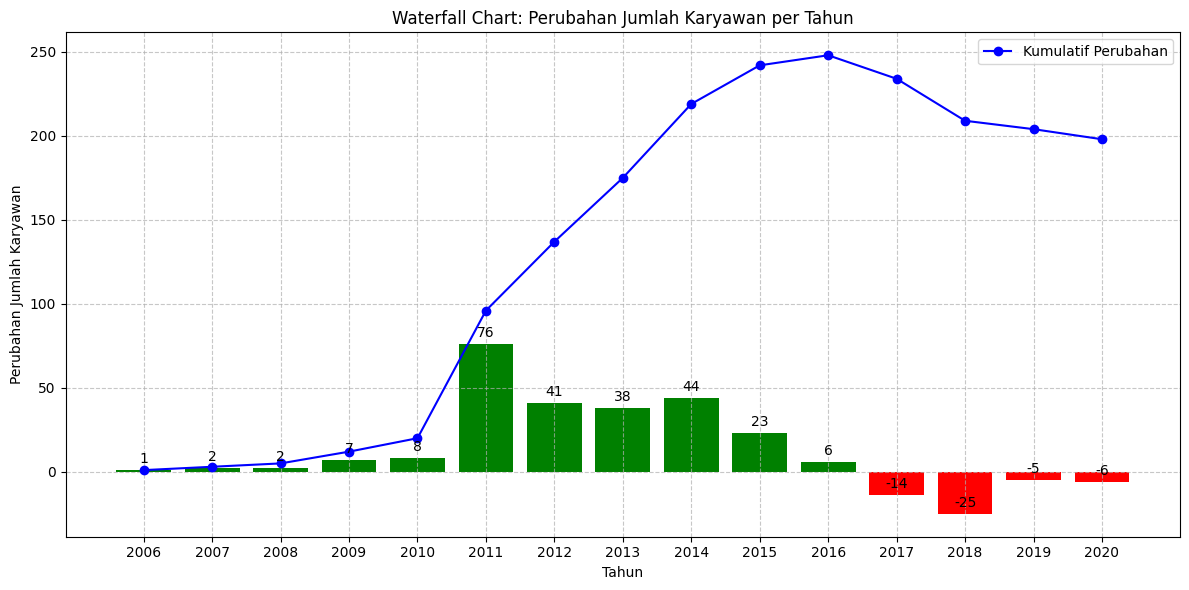

In [32]:
tahun = tabel_gabung['Tahun'].astype(str)  # Konversi tahun ke string untuk label
perubahan = tabel_gabung['Turnover']

# Calculate cumulative of turnover
kumulatif = np.cumsum(perubahan)

# Buat waterfall chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar untuk perubahan
bars = ax.bar(tahun, perubahan, color=np.where(perubahan > 0, 'green', 'red'))

# Tambahkan garis kumulatif
ax.plot(tahun, kumulatif, marker='o', linestyle='-', color='blue', label='Kumulatif Perubahan')

# Tambahkan label dan judul
ax.set_title('Waterfall Chart: Perubahan Jumlah Karyawan per Tahun')
ax.set_xlabel('Tahun')
ax.set_ylabel('Perubahan Jumlah Karyawan')
ax.legend()

# Tambahkan nilai di atas setiap bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Tampilkan plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
# Filter data untuk tahun resign 2018
data_2018 = df2[df2['TahunResign'] == 2018]
most_resign = data_2018.groupby('AlasanResign').size().reset_index(name='Jumlah')

most_resign

,AlasanResign,Jumlah
0,Product Design (UI & UX),1
1,ganti_karir,3
2,internal_conflict,1
3,jam_kerja,6
4,kejelasan_karir,5
5,leadership,2
6,tidak_bahagia,4
7,tidak_bisa_remote,2
8,toxic_culture,2


## B. Resign Reason Analysis For Employee Attrition Management Strategy
### 1. Create Two DataFrame

In [35]:
# Filter data untuk employee yang sudah resign
df_resign = df2[df2['TanggalResign'].notna()]  

# Filter data untuk employee yang belum resign
df_belum_resign = df2[df2['TanggalResign'].isna()]  

# Agregasi jumlah employee yang sudah resign berdasarkan pekerjaan
df_resign_agregasi = df_resign.groupby('Pekerjaan').size().reset_index(name='JumlahResign')

# Agregasi jumlah employee yang belum resign berdasarkan pekerjaan
df_belum_resign_agregasi = df_belum_resign.groupby('Pekerjaan').size().reset_index(name='JumlahBelumResign')

### 2. Merge DataFrame

In [37]:
# Gabungkan kedua DataFrame berdasarkan Pekerjaan
df_merge = pd.merge(df_resign_agregasi, df_belum_resign_agregasi, on='Pekerjaan', how='outer')

# Isi nilai null dengan 0 (jika ada pekerjaan yang tidak memiliki resign atau belum resign)
df_merge = df_merge.fillna(0)

df_merge['JumlahResign'] = df_merge['JumlahResign'].astype(int)
df_merge

,Pekerjaan,JumlahResign,JumlahBelumResign
0,Data Analyst,8,8
1,Data Engineer,3,7
2,Product Design (UI & UX),9,15
3,Product Manager,6,11
4,Software Engineer (Android),7,17
5,Software Engineer (Back End),28,81
6,Software Engineer (Front End),28,44
7,DevOps Engineer,0,3
8,Digital Product Manager,0,2
9,Machine Learning Engineer,0,2


### 3. Create New Column

In [39]:
# Hitung total employee
df_merge['JumlahEmployee'] = df_merge['JumlahResign'] + df_merge['JumlahBelumResign']

# Hitung persentase employee yang masih ada
df_merge['PersentaseBelumResign'] = (df_merge['JumlahBelumResign'] / df_merge['JumlahEmployee']) * 100

#Format Persentase
#Format Percentage Null
df_merge['PersentaseBelumResign'] = df_merge['PersentaseBelumResign'].apply(
    lambda x: f"{x:.2f}%" if x != 0 else "0%"
)

df_merge

,Pekerjaan,JumlahResign,JumlahBelumResign,JumlahEmployee,PersentaseBelumResign
0,Data Analyst,8,8,16,50.00%
1,Data Engineer,3,7,10,70.00%
2,Product Design (UI & UX),9,15,24,62.50%
3,Product Manager,6,11,17,64.71%
4,Software Engineer (Android),7,17,24,70.83%
5,Software Engineer (Back End),28,81,109,74.31%
6,Software Engineer (Front End),28,44,72,61.11%
7,DevOps Engineer,0,3,3,100.00%
8,Digital Product Manager,0,2,2,100.00%
9,Machine Learning Engineer,0,2,2,100.00%


### 4. Create Plot of Percentage Employee

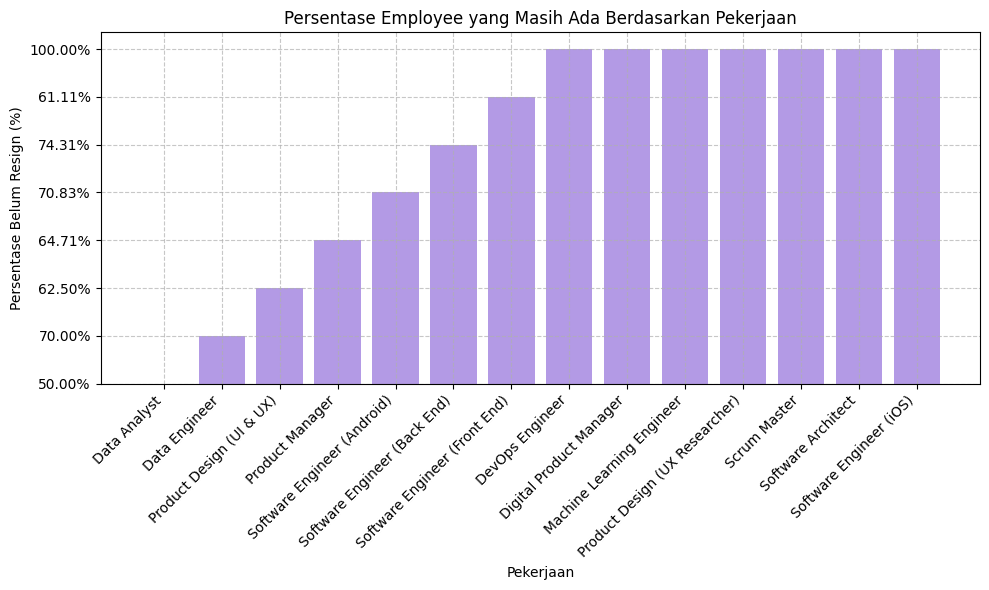

In [41]:
import matplotlib.pyplot as plt

# Plot persentase employee yang masih ada
plt.figure(figsize=(10, 6))
plt.bar(df_merge['Pekerjaan'], df_merge['PersentaseBelumResign'], color='mediumpurple', alpha=0.7)

# Judul dan label
plt.title('Persentase Employee yang Masih Ada Berdasarkan Pekerjaan')
plt.xlabel('Pekerjaan')
plt.ylabel('Persentase Belum Resign (%)')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar tidak tumpang tindih
plt.grid(True, linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()

### 5. Aggregation Table for Divisions with the Highest Resign Rates

In [43]:
df_analyst = df.query("Pekerjaan == 'Data Analyst'").groupby(["JenjangKarir","PerformancePegawai","AlasanResign"]).count()["EnterpriseID"].reset_index()
df_analyst


,JenjangKarir,PerformancePegawai,AlasanResign,EnterpriseID
0,Freshgraduate_program,Bagus,masih_bekerja,1
1,Freshgraduate_program,Bagus,toxic_culture,1
2,Freshgraduate_program,Biasa,internal_conflict,1
3,Freshgraduate_program,Biasa,masih_bekerja,1
4,Freshgraduate_program,Biasa,toxic_culture,1
5,Freshgraduate_program,Sangat_bagus,internal_conflict,1
6,Freshgraduate_program,Sangat_bagus,toxic_culture,3
7,Freshgraduate_program,Sangat_kurang,toxic_culture,1
8,Mid_level,Bagus,masih_bekerja,1
9,Mid_level,Kurang,masih_bekerja,1


In [44]:
df_analyst_2 = df_analyst.drop(df_analyst[df_analyst['AlasanResign'] == 'masih_bekerja'].index)
df_analyst_2

,JenjangKarir,PerformancePegawai,AlasanResign,EnterpriseID
1,Freshgraduate_program,Bagus,toxic_culture,1
2,Freshgraduate_program,Biasa,internal_conflict,1
4,Freshgraduate_program,Biasa,toxic_culture,1
5,Freshgraduate_program,Sangat_bagus,internal_conflict,1
6,Freshgraduate_program,Sangat_bagus,toxic_culture,3
7,Freshgraduate_program,Sangat_kurang,toxic_culture,1


### 6. Create Plot of Aggregation Table

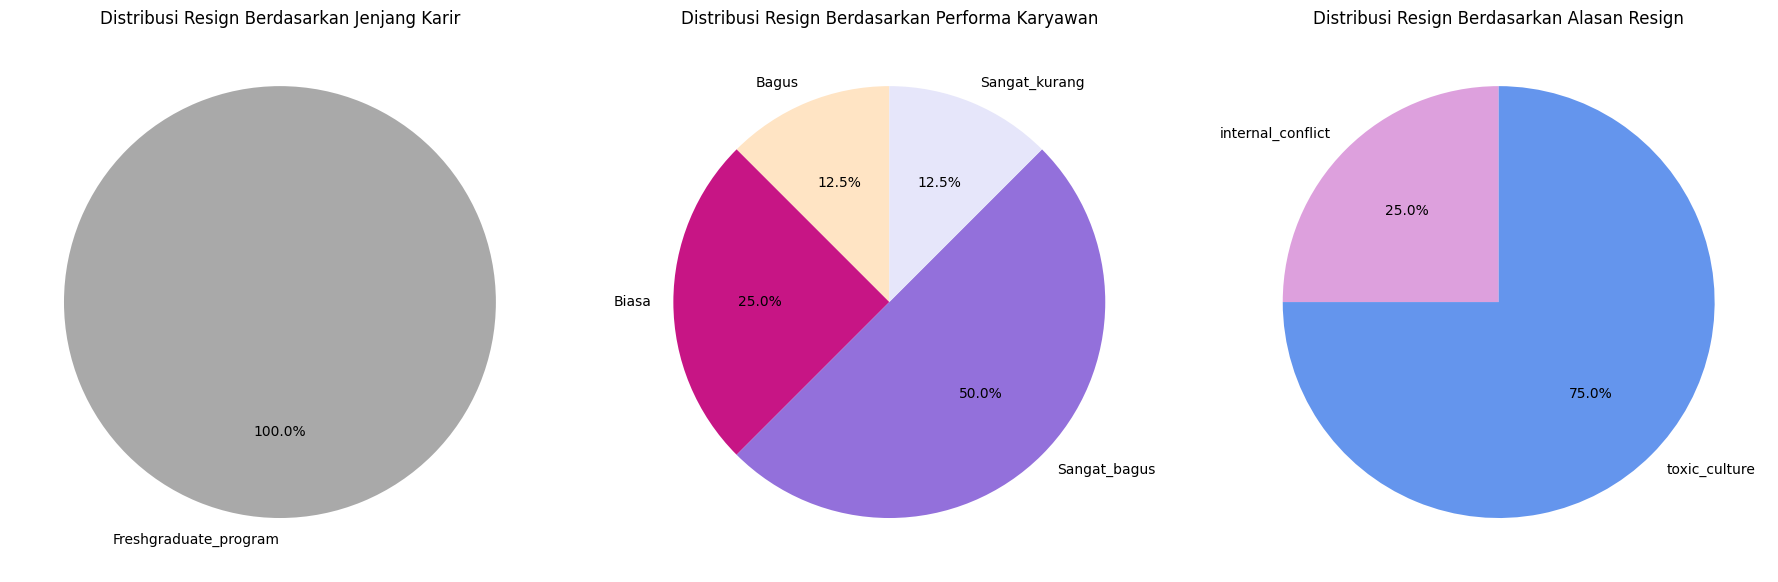

In [46]:
import matplotlib.pyplot as plt

# Hitung jumlah employee berdasarkan Jenjang Karir
jenjang_karir = df_analyst_2.groupby('JenjangKarir')['EnterpriseID'].sum().reset_index()

# Hitung jumlah employee berdasarkan Performa Karyawan
performa_karyawan = df_analyst_2.groupby('PerformancePegawai')['EnterpriseID'].sum().reset_index()

# Hitung jumlah employee berdasarkan Alasan Resign
alasan_resign = df_analyst_2.groupby('AlasanResign')['EnterpriseID'].sum().reset_index()

# Plot Pie Chart untuk Jenjang Karir
plt.figure(figsize=(18, 6))

# Pie Chart 1: Jenjang Karir
plt.subplot(1, 3, 1)
plt.pie(jenjang_karir['EnterpriseID'], labels=jenjang_karir['JenjangKarir'], autopct='%1.1f%%', startangle=90, colors=['darkgrey', 'pink'])
plt.title('Distribusi Resign Berdasarkan Jenjang Karir')

# Pie Chart 2: Performa Karyawan
plt.subplot(1, 3, 2)
plt.pie(performa_karyawan['EnterpriseID'], labels=performa_karyawan['PerformancePegawai'], autopct='%1.1f%%', startangle=90, colors=['bisque', 'mediumvioletred', 'mediumpurple', 'lavender', 'olive'])
plt.title('Distribusi Resign Berdasarkan Performa Karyawan')

# Pie Chart 3: Alasan Resign
plt.subplot(1, 3, 3)
plt.pie(alasan_resign['EnterpriseID'], labels=alasan_resign['AlasanResign'], autopct='%1.1f%%', startangle=90, colors=['plum', 'cornflowerblue', 'slateblue'])
plt.title('Distribusi Resign Berdasarkan Alasan Resign')

# Tampilkan plot
plt.tight_layout()
plt.show()

# Build Machine Learning

In [48]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [49]:
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['TahunResign'] = df['TanggalResign'].dt.year
df['TahunResign'].fillna(0, inplace=True)

# Feature Engineering
df["Lama_bekerja"] = df["TahunResign"].map(lambda x: 0 if x == "-" else x).astype(int) - df["TahunHiring"].astype(int)
df["Lama_bekerja"] = df["Lama_bekerja"].map(lambda x: 0 if x < 0 else x)
df["Usia_hired"] = df["TahunHiring"].astype(int) - df["TanggalLahir"].dt.year
#df["isResign"] = np.where(df["TanggalResign"].isna(), 0, 1)
df["isResign"] = df["TanggalResign"].map(lambda x: 1 if x != "-" and not pd.isna(x) else 0)
df["isResign"] = df["isResign"].map(lambda x: 1 if x == 1 else 0)

In [50]:
df['isResign'].value_counts()

isResign
0    198
1     89
Name: count, dtype: int64

In [51]:
#drop kolom yang tidak dipakai
df_ml = df.drop(['Username', 'NomorHP', 'Email', 'JenisKelamin', 'AsalDaerah', 'HiringPlatform', 'TanggalLahir', 
                             'IkutProgramLOP','TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign', 'TahunResign', 'TahunHiring'], axis=1)

In [52]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   EnterpriseID                        287 non-null    object
 1   StatusPernikahan                    287 non-null    object
 2   StatusKepegawaian                   287 non-null    object
 3   Pekerjaan                           287 non-null    object
 4   JenjangKarir                        287 non-null    object
 5   PerformancePegawai                  287 non-null    object
 6   SkorSurveyEngagement                287 non-null    int32 
 7   SkorKepuasanPegawai                 287 non-null    int32 
 8   JumlahKeikutsertaanProjek           287 non-null    int32 
 9   JumlahKeterlambatanSebulanTerakhir  287 non-null    int32 
 10  JumlahKetidakhadiran                287 non-null    int32 
 11  TingkatPendidikan                   287 non-null    object

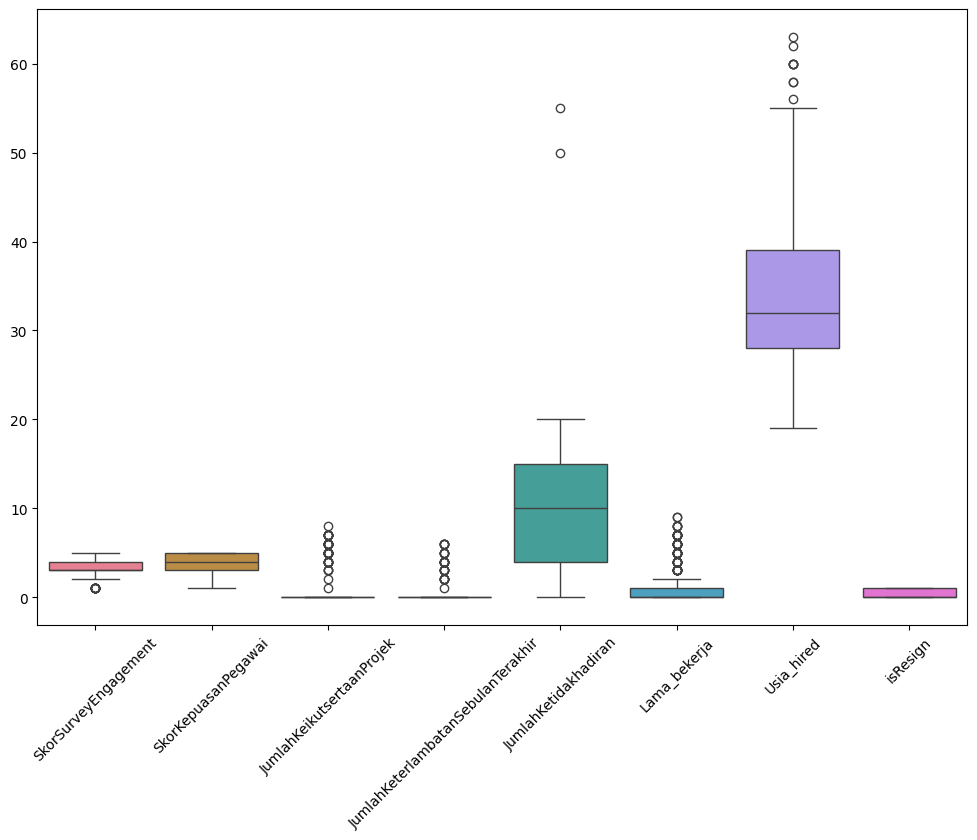

In [53]:
df_ml['EnterpriseID'] = df_ml['EnterpriseID'].astype(int)
# Use Boxplot
df_numerical = df_ml.select_dtypes(include = ["int32","int64","float64"])

# Figure Size Setting
plt.figure(figsize=(12,8))

# Boxplot using Seaborn
sns.boxplot(data = df_numerical.drop(["EnterpriseID"],axis=1), palette="husl")
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [54]:
df_numerical.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,Lama_bekerja,Usia_hired,isResign
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,105923.324042,3.101045,3.905923,1.167247,0.411150,10.229965,1.254355,34.080139,0.310105
std,4044.977599,0.836388,0.905423,2.285537,1.273018,6.991709,2.353715,8.854922,0.463344
min,100282.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,4.000000,0.000000,28.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,0.000000,32.000000,0.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000,39.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,9.000000,63.000000,1.000000


In [55]:
df_ml["StatusPernikahan"] = df_ml["StatusPernikahan"].map(lambda x: "Lainnya" if x == "-" else x)

education_class = {"Sarjana": 1, 
                   "Magister": 2,
                   "Doktor": 3}
df_ml["TingkatPendidikan"] = df_ml["TingkatPendidikan"].map(education_class)

career_level = {"Freshgraduate_program": 1, 
                "Mid_level": 2,
                "Senior_level": 3}
df_ml["JenjangKarir"] = df_ml["JenjangKarir"].map(career_level)

performance_class = {"Sangat_kurang" : 1,
                     "Kurang" : 2,
                     "Biasa" : 3,
                     "Bagus" : 4,
                     "Sangat_bagus" : 5}
df_ml["PerformancePegawai"] = df_ml["PerformancePegawai"].map(performance_class)

In [56]:
df_categorical = df_ml.select_dtypes(exclude = ["int32","int64","float64"])

In [57]:
feature_labelencoding = []
feature_onehot = []
feature_frequency = []

# Iteration
for i in df_categorical.columns:
    test_loop = df_categorical[i].unique().tolist()
    print(test_loop)
    # Logic pada categorical transformation diatas
    if len(test_loop) == 2:
        print(f"{i} is Dichotomous ({len(test_loop)}): Yes or No. Strategy: Label Encoder")
        feature_labelencoding.append(i)
    elif 2 < len(test_loop) <= 6:
        print(f"{i} has 3 - 6 unique values ({len(test_loop)}). Strategy: One-hot Encoding")
        feature_onehot.append(i)
    elif len(test_loop) > 6:
        print(f"{i} has 3 - 6 unique values ({len(test_loop)}). Strategy: Frequency Encoding")
        feature_frequency.append(i)
    else:
        print(f"{i} is Other")
    print("")

['Belum_menikah', 'Menikah', 'Bercerai', 'Lainnya']
StatusPernikahan has 3 - 6 unique values (4). Strategy: One-hot Encoding

['Outsource', 'FullTime', 'Internship']
StatusKepegawaian has 3 - 6 unique values (3). Strategy: One-hot Encoding

['Software Engineer (Back End)', 'Data Analyst', 'Software Engineer (Front End)', 'Product Manager', 'Software Engineer (Android)', 'Scrum Master', 'Product Design (UX Researcher)', 'Product Design (UI & UX)', 'Digital Product Manager', 'Data Engineer', 'Software Engineer (iOS)', 'DevOps Engineer', 'Software Architect', 'Machine Learning Engineer']
Pekerjaan has 3 - 6 unique values (14). Strategy: Frequency Encoding

['masih_bekerja', 'toxic_culture', 'jam_kerja', 'ganti_karir', 'tidak_bahagia', 'internal_conflict', 'Product Design (UI & UX)', 'kejelasan_karir', 'tidak_bisa_remote', 'apresiasi', 'leadership']
AlasanResign has 3 - 6 unique values (11). Strategy: Frequency Encoding



In [58]:
# One Hot Encoding with pandas get dummy
df_categorical = pd.get_dummies(df_categorical)
df_categorical.head()

,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,...,AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_masih_bekerja,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,True,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,True,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [59]:
#merge
df_ml_2 = pd.concat([df_numerical,df_categorical],axis=1).set_index(["EnterpriseID"])
df_ml_2 = df_ml_2.rename(columns={"isResign":"y"})
df_ml_2.head()

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,Lama_bekerja,Usia_hired,y,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,...,AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_masih_bekerja,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture
EnterpriseID,,,,,,,,,,,,,,,,,,,,,
111065,4,4,0,0,9,0,39,0,True,False,...,False,False,False,False,False,False,True,False,False,False
106080,4,4,4,0,3,4,30,1,True,False,...,False,False,False,False,False,False,False,False,False,True
106452,4,3,0,0,11,3,37,1,False,False,...,False,False,False,True,False,False,False,False,False,False
106325,3,3,0,4,6,0,35,0,True,False,...,False,False,False,False,False,False,True,False,False,False
111171,3,3,0,0,11,5,39,1,True,False,...,False,True,False,False,False,False,False,False,False,False


### Check Imbalance Data

In [62]:
# cek imbalance data
df_ml_2['y'].value_counts(normalize=True)

y
0    0.689895
1    0.310105
Name: proportion, dtype: float64

In [63]:
pip install --user pycaret

Note: you may need to restart the kernel to use updated packages.


In [65]:
!pip show pycaret

Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: C:\Users\X1\AppData\Roaming\Python\Python312\site-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, xxhash, yellowbrick
Required-by: 


In [66]:
import pycaret
from pycaret.classification import *
best_model = compare_models(['lr', 'knn', 'svm', 'dt', 'rf', 'ada', 'nb', 'lightgbm'])

RuntimeError: ('Pycaret only supports python 3.9, 3.10, 3.11. Your actual Python version: ', sys.version_info(major=3, minor=12, micro=4, releaselevel='final', serial=0), 'Please DOWNGRADE your Python version.')